In [22]:
import numpy as np
import LatticeDefinitions as ld
import GeometryFunctions as gf
import GeneralLattice as gl
import LAMMPSDump as LD
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [ ]:
##File format Tripleline ID, Tripleline Centre, TJ Energy, Radius, TJ Atoms
##GBEnergy, GBAtoms
strDirectory = '/home/paul/csf3_scratch/TripleLines/data'
lstAllFilenames = []
strData = ''
for j in range(1,21):
    fin = open(strDirectory + str(j) + '/summary.data' + str(j), 'rt')
    strData +=  fin.read()
df = pd.DataFrame([x.split(',') for x in strData.split('\n')])
print(np.where(df[3].astype('float')==0))
df[:,20]

(array([ 1.,  1.,  0.,  1.,  4.,  4.,  5., 19., 20., 23., 20.,  7.,  5.,
         3.,  4.,  2.,  0.,  0.,  0.,  1.]),
 array([-0.06178844, -0.05302541, -0.04426237, -0.03549933, -0.0267363 ,
        -0.01797326, -0.00921022, -0.00044719,  0.00831585,  0.01707889,
         0.02584192,  0.03460496,  0.043368  ,  0.05213103,  0.06089407,
         0.06965711,  0.07842014,  0.08718318,  0.09594622,  0.10470925,
         0.11347229]),
 <a list of 20 Patch objects>)

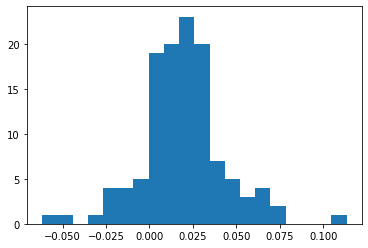

In [36]:
arrValues = df[2].astype('float')-df[5].astype('float');
arrValues = arrValues[arrValues < 2];
plt.hist(arrValues, bins=20)

In [40]:
3*np.sqrt(np.var(arrValues))

0.07384011296978284

In [52]:
lstTJEV = []
for k in range(len(df)):
    arrRow = np.array(df[k])
    lstTJEV.append(arrRow[2].astype('float')*arrRow[4].astype('float')/(np.pi*arrRow[3].astype('float')**2*80.1))

AttributeError: 'str' object has no attribute 'astype'

In [54]:
np.array(df[2].astype('float'))

array([-3.28757135, -3.2696219 , -3.22917926, -3.20094552, -3.19314895,
       -3.21978979, -3.256658  , -3.25284264, -3.2396385 , -3.27313091,
       -3.189654  , -3.19186424, -3.27455638, -3.23486629, -3.25155647,
       -3.23680486, -3.26443226, -3.27341084, -3.25808823, -3.25101133,
       -3.29075153, -3.2956558 , -3.24029258, -3.26165204, -3.27786511,
       -3.27129617, -3.23470769, -3.2244325 , -3.3373095 , -3.28278836,
       -3.27911935, -3.25703422, -3.24601487, -3.23996403, -3.2662471 ,
       -3.23806237, -3.247125  , -3.24329724, -3.26004571, -3.26955623,
       -3.24197711, -3.26293592, -3.2653772 , -3.26697144, -3.26493382,
       -3.25514214, -3.25571417, -3.27467219, -3.25423302, -3.27727743,
       -3.26594461, -3.24263704, -3.23926941, -3.2449504 , -3.20296275,
       -3.23690181, -3.22807889, -3.28641532, -3.21831708, -3.25442   ,
       -3.28142225, -3.19328967, -3.23681831, -3.2501956 , -3.2323508 ,
       -3.3188307 , -3.24722051, -3.26062865, -3.25237227, -3.22